In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn import metrics

In [2]:
df = pd.read_csv('/Users/avanijain/Desktop/Machine_Learning/Ml_project/student-mat.csv', sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
#Categorical Variable
dfConverted = pd.get_dummies(df)

In [4]:
X = dfConverted.drop('G3', axis = 1)
y = dfConverted[['G3']]

In [5]:
list_y=y['G3'].tolist()

In [6]:
classify=[]
for i in list_y:
    if i>10:
        classify.append(1)
    else:
        classify.append(0)

In [7]:
y.insert(len(y.columns),"pass/fail", classify)

In [8]:
y=y.drop('G3', axis=1)

In [9]:
y

,pass/fail
0,0
1,0
2,0
3,1
4,0
...,...
390,0
391,1
392,0
393,0


In [10]:
#Splitting the dataset nto training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=0)

In [11]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [12]:
#Fitting the logistic regression to training set
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
#Predicting the Test set results
y_pred=classifier.predict(X_test)

In [14]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1])

In [27]:
y_test.head(15)

,pass/fail
329,1
318,0
317,0
65,1
59,1
287,1
212,1
60,1
394,0
324,1


In [15]:
#Making the confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)

In [16]:
cm

array([[43,  8],
       [ 1, 47]])

In [17]:
#converting it into list for eval function
y_pred_list=list(y_pred)
y_test_list=y_test['pass/fail'].tolist()

In [18]:
#Model Evaluation
def model_eval(predict,y):
    tp,tn,fp,fn = 0,0,0,0
    for i in range(len(y)):
        if predict[i] == 1:
            if y[i] == 1:
                tp += 1
            else:
                fp += 1
        else:
            if y[i] == 1:
                fn += 1
            else:
                tn += 1
    
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = (2)*(precision*recall)/(precision+recall)
    print('\tConfusion Matrix')
    print('------------------------------')
    print('\t   Predict')
    print('            "1" |  "0"')
    print('Actual "1"|',tp,'|',fn)
    print('       "0"|',fp,' |',tn)
    print('------------------------------')
    print('')

    print('accuracy = ', accuracy)
    print('precision = ', precision)
    print('recall = ', recall)
    print('F1 = ',f1)
    return tp,fp,fn,tn

In [19]:
model_eval(y_pred_list,y_test_list)

	Confusion Matrix
------------------------------
	   Predict
            "1" |  "0"
Actual "1"| 47 | 1
       "0"| 8  | 43
------------------------------

accuracy =  0.9090909090909091
precision =  0.8545454545454545
recall =  0.9791666666666666
F1 =  0.912621359223301


(47, 8, 1, 43)

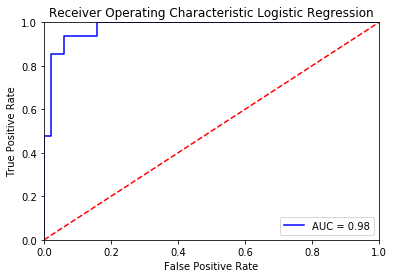

In [20]:
#Plot the ROC curve for logistic regression
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr,tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic Logistic Regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()